Implement Dantzig's 3d assignment model for the TSP. Does it work???
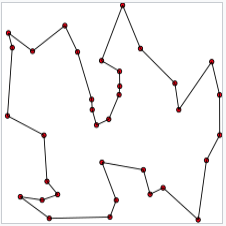

In [1]:
import networkx as nx

n = 20                                   # number of cities
G = nx.complete_graph(n, nx.DiGraph())  # *directed* graph with a vertex for each city

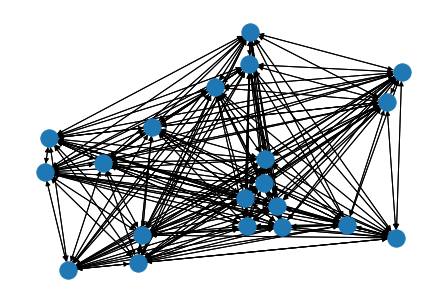

In [2]:
# for convenience, pick the city (x,y)-coordinates at random
import random

my_pos = { i : ( random.random(), random.random() ) for i in G.nodes } # pos[i] = (x_i, y_i)
nx.draw(G, pos=my_pos)

In [3]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

n = G.number_of_nodes()

c = dict()

for i in range(n):
    for j in range(n):
        (x1,y1) = my_pos[i]
        (x2,y2) = my_pos[j]
        c[i,j] = eucl_dist(x1,y1,x2,y2)

In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
# Solve Dantzig's 3-D assignment problem

m = gp.Model()
x = m.addVars(n, n, n, vtype=GRB.BINARY)

m.setObjective( gp.quicksum( c[i,j] * x[i,j,t] for i in range(n) for j in range(n) for t in range(n) ), GRB.MINIMIZE )

# Dantzig's constraints
m.addConstrs( gp.quicksum( x[i,j,t] for i in range(n) for j in range(n) ) == 1 for t in range(n) )
m.addConstrs( gp.quicksum( x[i,j,t] for i in range(n) for t in range(n) ) == 1 for j in range(n) )
m.addConstrs( gp.quicksum( x[i,j,t] for j in range(n) for t in range(n) ) == 1 for i in range(n) )

# no self-loops
m.addConstrs( gp.quicksum( x[i,i,t] for t in range(n) ) == 0 for i in range(n) )

# Constraints of Serhat Saylam
m.addConstrs( gp.quicksum( x[i,j,t] for i in range(n) ) + gp.quicksum( x[j,k,t+1] for k in range(n) ) == 2 for j in range(n) for t in range(n-1) )

m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-01-01
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 460 rows, 8000 columns and 39600 nonzeros
Model fingerprint: 0xefaf2ada
Variable types: 0 continuous, 8000 integer (8000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 20 rows and 773 columns
Presolve time: 0.29s

Explored 0 nodes (0 simplex iterations) in 0.31 seconds (0.23 work units)
Thread count was 1 (of 8 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


In [6]:
# get the solution and draw it
tour_edges = [ (i,j) for i in range(n) for j in range(n) for t in range(n) if x[i,j,t].x > 0.5 ]
print(tour_edges)
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)

AttributeError: Unable to retrieve attribute 'x'